In [3]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.distributions.mixture_rvs import mixture_rvs
import seaborn as sns; sns.set()
import math
import window # implementation move window filter

## Task1

In [12]:
data = pd.read_excel('data_mag_rad.xls')
data.describe()

,team,point,y,x,hight,Igamma,data
count,11.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,6.000000,15.515432,44.785019,34.012791,382.453704,11.498148,48912.811728
std,3.316625,8.948930,0.006425,0.008246,68.078499,3.422788,176.810576
min,1.000000,1.000000,44.770556,33.993889,251.000000,3.000000,48283.000000
25%,3.500000,8.000000,44.780208,34.006875,324.750000,9.500000,48807.000000
50%,6.000000,15.000000,44.785000,34.012500,381.500000,12.000000,48827.500000
75%,8.500000,23.000000,44.790833,34.018125,437.500000,14.000000,49007.250000
max,11.000000,36.000000,44.796944,34.032500,550.000000,19.000000,49850.000000


In [13]:
# try to clear data sets, but it was not useful. Data source need more filters, because here many bags. ) 
clear1 = window.move_window_median2(data_set,5)
clear2 = window.move_window_median2(data_set1,5)

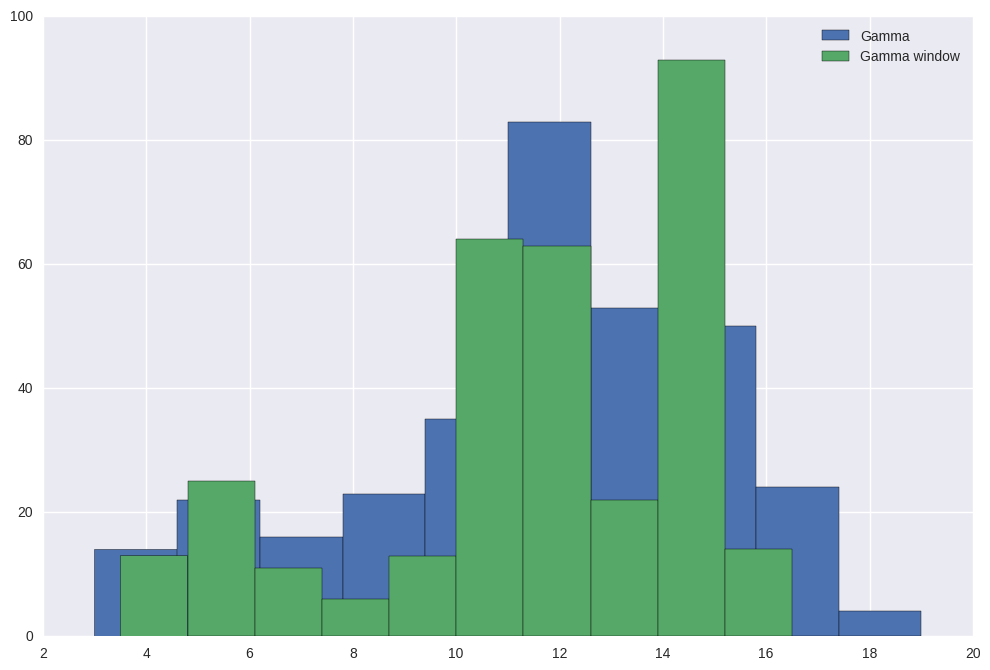

In [14]:
# bad bad data) 
fig = plt.figure(figsize=(12,8))
plt.hist(data.Igamma, label='Gamma')
plt.hist(clear1, label='Gamma window')
plt.legend(loc="best")
plt.show()

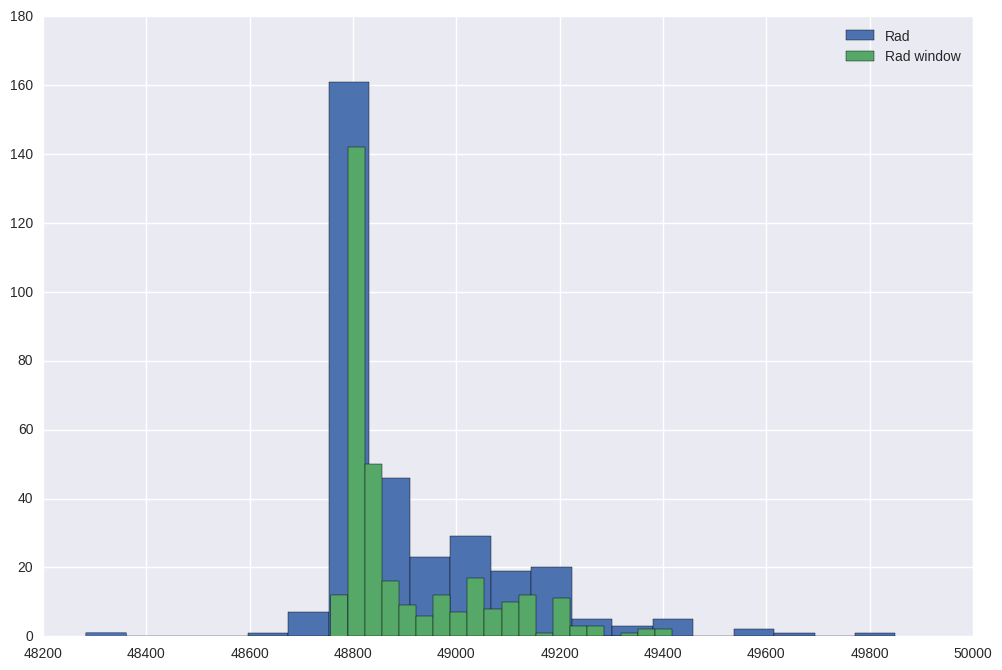

In [15]:
# log normal + normal 
fig = plt.figure(figsize=(12,8))
plt.hist(data.data, bins=20, label='Rad')
plt.hist(clear2, bins=20, label='Rad window')
plt.legend(loc="best")
plt.show()

In [16]:
data_set = np.array(data.Igamma)
data_set1 = np.array(data.data, dtype = np.float64)

In [17]:
gaussian_mixture = sm.nonparametric.KDEUnivariate(data_set)
gaussian_mixture.fit()

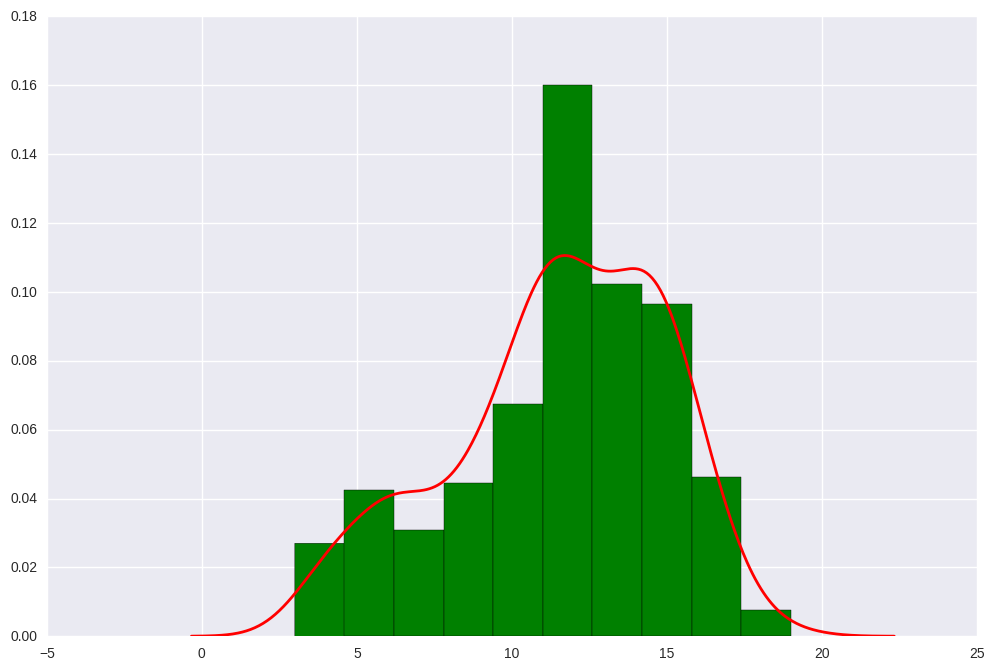

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(data_set, bins=10, normed=True, color='green')
ax.plot(gaussian_mixture.support, gaussian_mixture.density, lw=2, color='red')
plt.show()

In [19]:
gaussian_mixture1 = sm.nonparametric.KDEUnivariate(np.log10(data_set1))
gaussian_mixture1.fit()

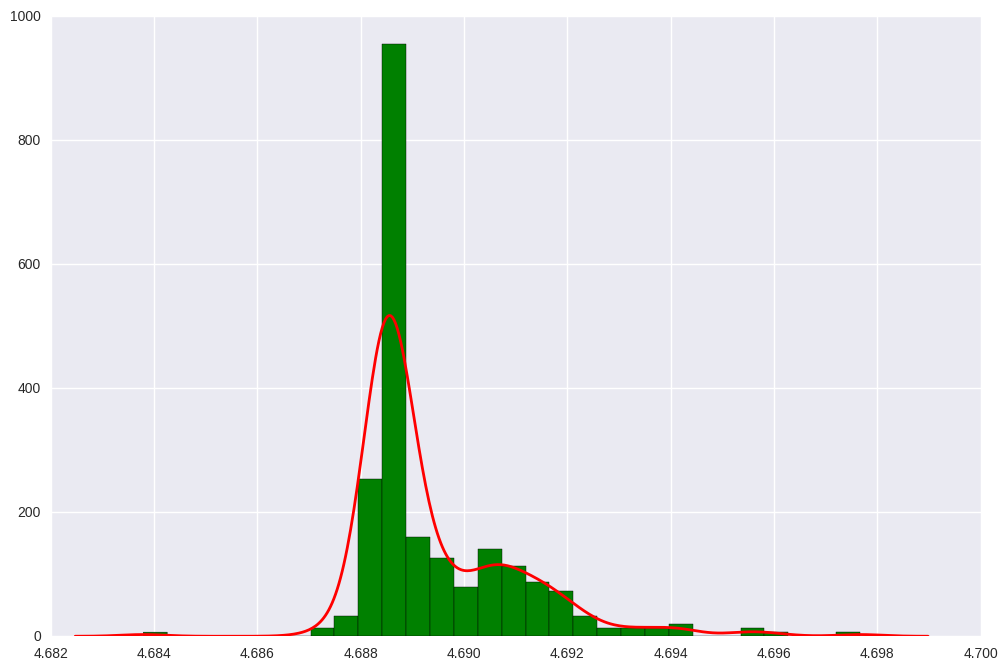

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.hist(np.log10(data_set1), bins = 30, normed=True, color='green')
ax1.plot(gaussian_mixture1.support, gaussian_mixture1.density, lw=2, color='red')
plt.show()

## Task2

In [92]:
points = np.array([(4,12),(8,20)])
x = np.array([4,8])
y = np.array([12,20])
def f(data):
    return map(lambda x: x*2+4, data)

### y = 2*x + 4

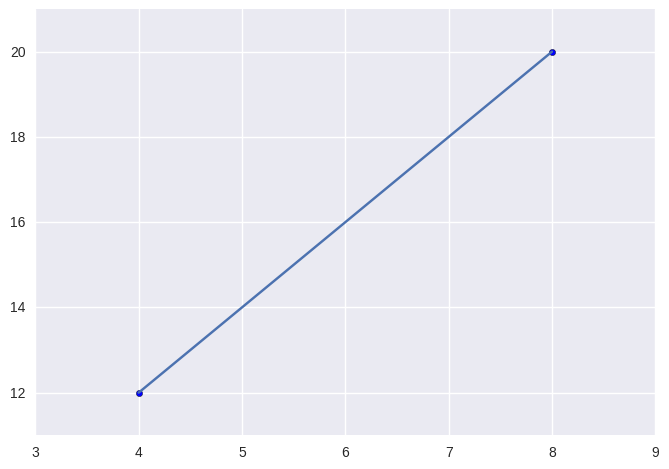

In [93]:
plt.scatter(x,y)
plt.plot(x,f(x))
plt.show()

In [94]:
def liner_coef(x,y):
    a = np.array(map(lambda up: [up,1],x))
    y = np.array(y)
    solve = np.linalg.solve(a,y)
    print 'your equation is y = x*{0} + {1}'.format(solve[0],solve[1])
    return solve

In [95]:
liner_coef(x,y)

your equation is y = x*2.0 + 4.0


array([ 2.,  4.])

In [329]:
def monte_carlo(x,y,n):
    solve = []
    k = np.random.uniform(-4,4,size=n)
    b = np.random.uniform(-8,8,size=n)
    solve = np.array(map(lambda t: y[0] - (x[0]*k[t]+b[t]),range(n)))
    solve1 = np.array(map(lambda t: y[1] - (x[1]*k[t]+b[t]),range(n)))
    return (solve1.sum())/n

In [330]:
test = monte_carlo(x,y,10000)
test

20.068269961857325

In [296]:
test[:1000][:1000][][:1]

SyntaxError: invalid syntax (<ipython-input-296-fe71f2ebe71e>, line 1)

In [218]:
t = [0,1]
t[1],t[0]

(1, 0)

[0, 1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]